# EDA on Montana Oil and Gas Production and Stimulation data
In this notebook will will take the data that we collected in the `DataCollection` Notebook and perform analysis to get a better understanding of the data set. Let's try to understand how many horizontal wells we have stimulation data for, what common materials are used in well stimulation, and how much these horizontal wells produce

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load in the .csv files that we created in the `DataCollection` jupyter notebook

In [52]:
FracFocusRegistry_df_MT = pd.read_csv('FracFocus\\FracFocusRegistry_df_MT.csv', low_memory=False)
registryupload_df_MT = pd.read_csv('FracFocus\\registryupload_df_MT.csv', low_memory=False)

hz_wells = pd.read_csv('StateData\\hz_wells.csv', low_memory=False)
hz_wells_prod = pd.read_csv('StateData\\hz_wells_prod.csv', low_memory=False)

## Well and Production Data

Let's begin by exploring the data from the Montana Board of Oil and Gas Conservation. What is the well type of the horizontal wells and what formation do they produce from?

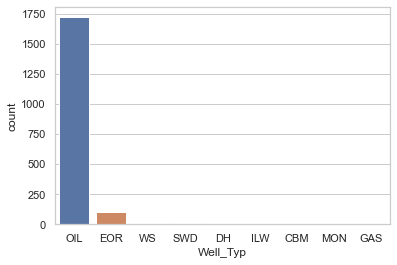

In [53]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Well_Typ", data=hz_wells)

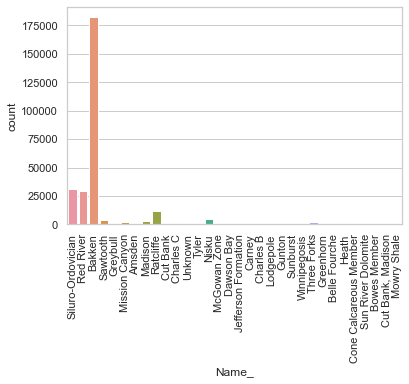

In [54]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Name_", data=hz_wells_prod)
ax.tick_params(axis='x', rotation=90)

## Stimulation Information
Let's continue by analyzing the data from FracFocus. Many of the ingredients were applicable have a CAS (Chemical Abstract Service )number associated with the component ingredients. You can look them up [here](https://commonchemistry.cas.org/) . The most common ingredient is 'Properietary', and 'Trade Secret' as well as 'Confidential are listed in the top 10. 7732-18-5 is the CAS number for water, next is 14808-60-7 which is quartz. The other numbers correspond to various alcohols and petroleum distillates.

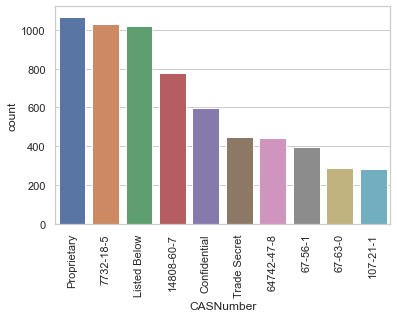

In [55]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="CASNumber", data=FracFocusRegistry_df_MT,
              order=FracFocusRegistry_df_MT.CASNumber.value_counts().iloc[:10].index)
ax.tick_params(axis='x', rotation=90)

What purpose do these materials serve? Looking at value counts, 'Other' seems to be a top category, but the others are proppant (corresponding to quartz), biocide and breaker

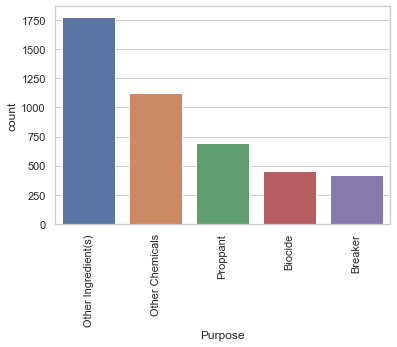

In [56]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Purpose", data=FracFocusRegistry_df_MT,
              order=FracFocusRegistry_df_MT.Purpose.value_counts().iloc[:5].index)
ax.tick_params(axis='x', rotation=90)

How much of these chemicals are pumped on an particular job? if we look at a histogram of the percentage volume, we can see that these chemicals only make up a small percentage of the total material being pumped. 

(0.0, 0.05)

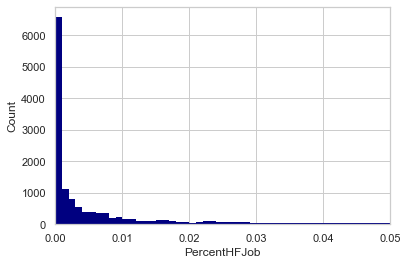

In [57]:
sns.histplot(data = FracFocusRegistry_df_MT
            ,x = 'PercentHFJob'
            ,color = 'navy'
            ,alpha = 1
            ,binwidth = .001
            )
plt.xlim(0, .05)

So what is the primary component of these treatments? If we sort by the `PercentHFJob` and inspect the `IngredientName` and `CASNumber` columns we can see that primary component is typically water.

In [58]:
FracFocusRegistry_df_MT.sort_values(by=['PercentHFJob'], ascending= False).head(n=10)

,UploadKey,JobStartDate,JobEndDate,APINumber,StateNumber,CountyNumber,OperatorName,WellName,Latitude,Longitude,...,IngredientKey,IngredientName,CASNumber,PercentHighAdditive,PercentHFJob,IngredientComment,IngredientMSDS,MassIngredient,ClaimantCompany,DisclosureKey
15600,6b795078-f7b6-419e-abaf-bc3942d4d0bf,10/28/2014 12:00:00 AM,11/5/2014 12:00:00 AM,25083232400000,25,83,Oasis Petroleum,POPPY FEDERAL 2658 12-17H,48.036370,-104.258000,...,724df8f6-920a-4589-a592-7ee1400e3ed7,Water,7732-18-5,100.0,99.541950,NaN,True,7.859751e+07,NaN,6b795078-f7b6-419e-abaf-bc3942d4d0bf
1661,91ffebde-808d-4073-88f1-832c4c5a7c26,8/21/2015 12:00:00 AM,8/21/2015 12:00:00 AM,25109210390000,25,109,Interstate Explorations LLC,LAWRENCE E 16-29,46.934370,-104.137050,...,ca7f62fa-38a9-4bb2-bf93-2b9c9197acc3,MSDS and Non-MSDS Ingredients Listed Below,NaN,0.0,98.611996,NaN,True,4.919838e+04,NaN,91ffebde-808d-4073-88f1-832c4c5a7c26
1586,b2f2066e-8273-4c31-8b7e-409674998f44,6/24/2015 12:00:00 AM,6/29/2015 12:00:00 AM,25105215800000,25,105,"Great Western Oil & Gas Company, LLC",Treasure 26-3143-302HC-C,48.410386,-106.085772,...,97cf48a5-5db5-40fe-9963-8688e1e92693,NFIDB:HCl > 10%,NFIDB:HCl > 10%,100.0,97.750771,NaN,False,3.580000e+04,NaN,b2f2066e-8273-4c31-8b7e-409674998f44
8984,050a51c5-8a50-4b5b-b574-7978f18af032,10/18/2013 12:00:00 AM,10/24/2013 12:00:00 AM,25085218150000,25,85,Statoil Oil & Gas LP,NELSON 27-22 - # 1 H,48.143838,-104.348526,...,17c629e0-efd7-4221-8601-fd93f53d6ae0,Water,7732-18-5,100.0,97.253368,NaN,True,7.601576e+07,NaN,050a51c5-8a50-4b5b-b574-7978f18af032
7846,e4640406-cdcf-4494-ac42-e7b6c396d707,9/26/2013 12:00:00 AM,9/28/2013 12:00:00 AM,25083231680000,25,83,"Slawson Exploration Company, Inc.",Cricket 1-30-19H,47.718910,-104.717020,...,a55125f9-aa84-4d76-8b59-5953f8ca6734,Water,7732-18-5,100.0,97.051838,NaN,True,6.624149e+06,NaN,e4640406-cdcf-4494-ac42-e7b6c396d707
12334,3c67b9e3-0cbc-44b2-99e0-2bcf12f22ff4,4/10/2014 12:00:00 AM,5/15/2014 12:00:00 AM,25083232030000,25,83,"Continental Resources, Inc",Stoney Butte 5-17H,47.776000,-104.563380,...,132ac5b5-ef02-4a97-8a69-c3b14e3f4f15,Water,7732-18-5,100.0,96.832814,NaN,True,1.086200e+08,NaN,3c67b9e3-0cbc-44b2-99e0-2bcf12f22ff4
12649,50627791-bdec-4562-bb81-26f5fbd612e4,5/31/2014 1:19:48 AM,5/31/2014 1:34:59 AM,25083232120000,25,83,Whiting Petroleum,Sundheim 21-3-3H,47.867041,-104.135630,...,1f6269e8-c041-442e-bc5c-a03153418430,Fresh Water,7732-18-5,100.0,96.546364,Density = 8.330,True,1.323827e+07,NaN,50627791-bdec-4562-bb81-26f5fbd612e4
3528,3ff36d97-bb99-4150-a2ce-a96e579138cb,9/20/2018 5:00:00 AM,9/22/2018 5:00:00 AM,25085219180000,25,85,Kraken Operating LLC,Gehringer 1-13H,48.185635,-104.172233,...,ecd277aa-cf08-4bb0-a63b-1aa13bf5c62c,Carrier,7732-18-5,100.0,96.378977,None,True,3.381183e+07,NaN,3ff36d97-bb99-4150-a2ce-a96e579138cb
13706,0c6ca3a5-0ca7-4800-9a00-97bff0742952,7/7/2014 12:00:00 AM,7/8/2014 12:00:00 AM,25083216450000,25,83,SM Energy,McChesney 2HR,47.683386,-104.332898,...,760a6559-4a26-4a56-b979-4d05fc1e01d5,Water (Including Mix Water Supplied by Client)*,NaN,0.0,96.174790,NaN,False,0.000000e+00,NaN,0c6ca3a5-0ca7-4800-9a00-97bff0742952
12803,bd0d23b8-8536-4d30-a2c4-01998c325ad6,6/1/2014 12:00:00 AM,6/5/2014 12:00:00 AM,25083231970000,25,83,"Continental Resources, Inc",David HSL,47.896640,-104.655310,...,31ad57b2-dc68-40c2-92a2-a399b4c77644,Water,7732-18-5,100.0,95.793050,NaN,True,6.789542e+07,NaN,bd0d23b8-8536-4d30-a2c4-01998c325ad6


Finally, it would be interesting to know how many wells do we have both FracFocus and State data on as well as the breakdown for the corresponding formation and well type

In [59]:
sum(hz_wells.API_WellNo.isin(list(registryupload_df_MT.APINumber)))

568

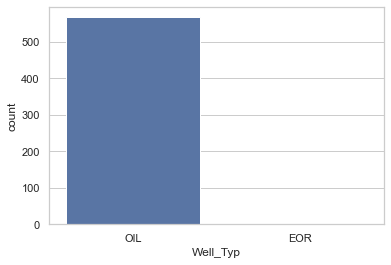

In [60]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Well_Typ", data=hz_wells[hz_wells.API_WellNo.isin(list(registryupload_df_MT.APINumber))])

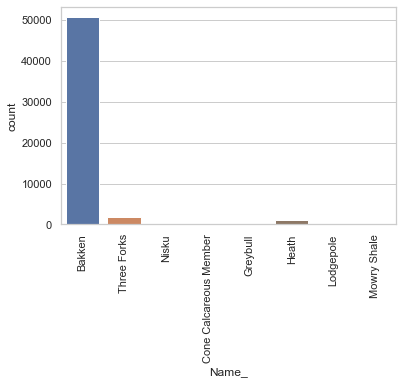

In [61]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Name_", data=hz_wells_prod[hz_wells_prod.API_WELLNO.isin(list(registryupload_df_MT.APINumber))])
ax.tick_params(axis='x', rotation=90)

So out of over 1500 horizontal wells we have FracFocus data for 568, which are overwhelmingly oil wells completed in the Bakken formation